# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [41]:
%matplotlib inline 

import pylab 
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.stats.weightstats as smw

body_temps = pd.read_csv('data/human_body_temperature.csv')

## 1. Is the distribution of body temperature normal? 

The distributions shape isn't perfectly symmetric, but it's close enough to normal to proceed. This conclusion is 
based on the histogram and Q-Q plot below. 
  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1183ab128>]], dtype=object)

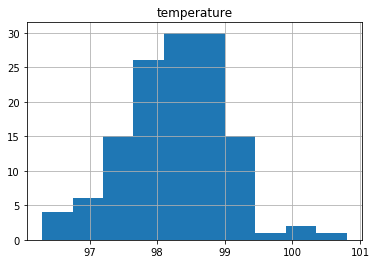

In [18]:
 #check using histogram
body_temps.hist(column = 'temperature')

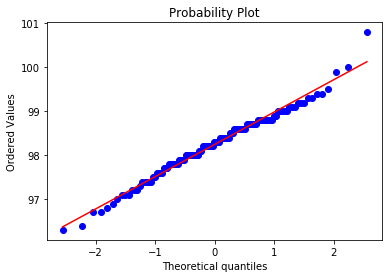

In [19]:
 #check using q-q plot 
st.probplot(body_temps.temperature, dist = "norm", plot = pylab)
pylab.show()

## 2. Is the sample size large? Are the observations independent? 

With respect to the criterion for using the Central Limit Theorem, the sample size is large.

Concerning independence of observations, this assumption is likely reasonable given that we are told it is a random sample. Moreover, there is no observable bias toward a certain gender, and the distribution of observed heart rates isn't markedly skewed. 

That said, the data itself was constructed based on an actual experiment, and little information is provided about data-collection methods in that experiment. For example, if sampling was done from people living only in one part of the world, that could introduce bias into the collected data. Ideally, we would have more information about how the original data were collected to see if independence of observations is truly a fair assumption in the constructed data. 

In [20]:
#Check number of observations in data set -- there are 130. 
body_temps.shape

(130, 3)

In [21]:
#Check balance of gender
body_temps.groupby('gender').size()

gender
F    65
M    65
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ba80da0>]], dtype=object)

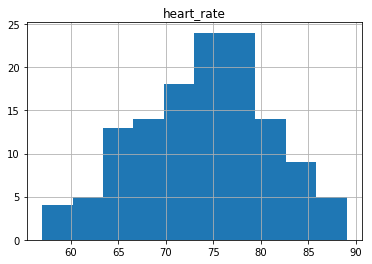

In [22]:
#Check distribution of heart rates -- approx. normal w/ some left skew
body_temps.hist(column = 'heart_rate')

## 3. Is the true population mean really 98.6 degrees F?

The only way to know the true population mean would be to collect data from every single member of the population and 
calculate the mean from there. Unless the population turns out to be a small one, this step is typically not feasible, so we can't know for sure if the true population mean is really 98.6 degrees F.

- Would you use a one-sample or two-sample test? Why?

I would use a one-sample test because we are not interested in the mean difference in body temperatures between two populations; we are interested in the mean body temperature for a single population.

- In this situation, is it appropriate to use the t or z statistic?

It is appropriate to use the t-statistic because we don't know the population's standard deviation. 

- Now try using the other test. How is the result different? Why? 

The p-value is lower because z and t follow different distributions. 

In [23]:
#t test
st.ttest_1samp(body_temps.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [42]:
#try with z-test
smw.ztest(body_temps.temperature, value = 98.6, alternative = 'two-sided')

(-5.4548232923645195, 4.9021570141012155e-08)

## 4. At what temperature should we consider someone's temperature to be "abnormal"?

Based on the confidence interval, an abnormal body temperature is below 98.12 or above 98.38.

According to the empirical rule, 95% of observations in a normal distribution are within 2 standard deviations of the mean. Using this as a guideline, an abnormal temperature is below 96.79 or above 99.71. This metric is a bit more inclusive and is not meant to replace a confidence interval, but it's another way to consider the question at hand.  

In [43]:
#find the margin of error and confidence interval
se = st.sem(body_temps.temperature)
st.t.interval(0.95, len(body_temps.temperature)-1, loc = np.mean(body_temps.temperature), scale = se), se

((98.122002905608042, 98.376458632853513), 0.064304416837891024)

In [44]:
#our of curiosity, look at empirical rule
    
    #find mean and standard deviation of sampling distribution
x_bar = np.mean(body_temps.temperature)
s = np.std(body_temps.temperature)

    #apply empirical rule
low = x_bar - (2*s)
high = x_bar + (2*s)
low, high

(96.7885152114207, 99.70994632704085)

## 5. Is there a significant difference between males and females in normal temperature?

- Which test did you use and why?

I used the unpaired, two-sample t-test (equal variances) because I am looking for a significant difference between the means of two independent groups, and an appropriate test showed no evidence against the assumption of equal variances.

- Write a story with your conclusion in the context of the original problem. 

Since the p-value (.024) is less than .05, we reject the null hypothesis and conclude that there is a significant difference between the average body temperatures for males and females.

In [70]:
#change column heading for upcoming histogram titles
male = body_temps.loc[body_temps['gender'] == 'M']
male_df = male.rename(columns = {'temperature':'male_temp'})
female = body_temps.loc[body_temps['gender'] == 'F']
female_df = female.rename(columns = {'temperature':'female_temp'})

#preview male and female variances to get a sense of whether the population variances might be equal
np.var(male.temperature), np.var(female.temperature)

(0.4807479289940825, 0.5442698224852062)

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cbecc50>]], dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cda07b8>]], dtype=object))

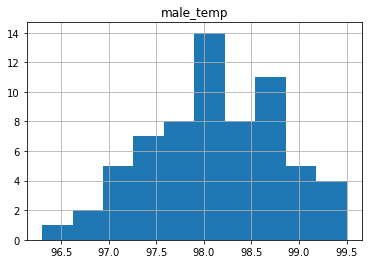

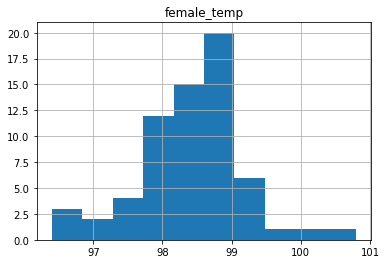

In [72]:
#Check shape of male and female distributions for departures from normality. This will determine which test of equal 
    #variances to use.
male_df.hist(column = 'male_temp'), female_df.hist(column = 'female_temp')

In [62]:
#data isn't perfectly normal but isn't too far away, either, so check for equal variances using Bartlett's test
st.bartlett(male.temperature, female.temperature)

BartlettResult(statistic=0.24435409134361702, pvalue=0.62107889633573721)

In [63]:
#fail to reject null in Bartlett's test since p-value > .05; use equal variances in t-test of means
st.ttest_ind(male.temperature, female.temperature, equal_var = True)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)